In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
# df.describe(include='object').T

# **EDA**

target
1    165
0    138
Name: count, dtype: int64


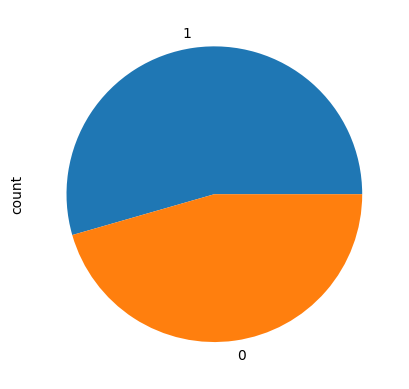

In [11]:
df['target'].value_counts().plot(kind='pie')
print(df['target'].value_counts())

<Axes: xlabel='target', ylabel='count'>

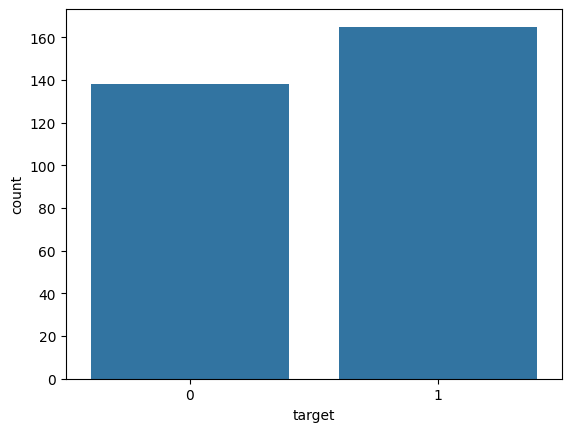

In [12]:
sns.countplot(data = df , x='target')

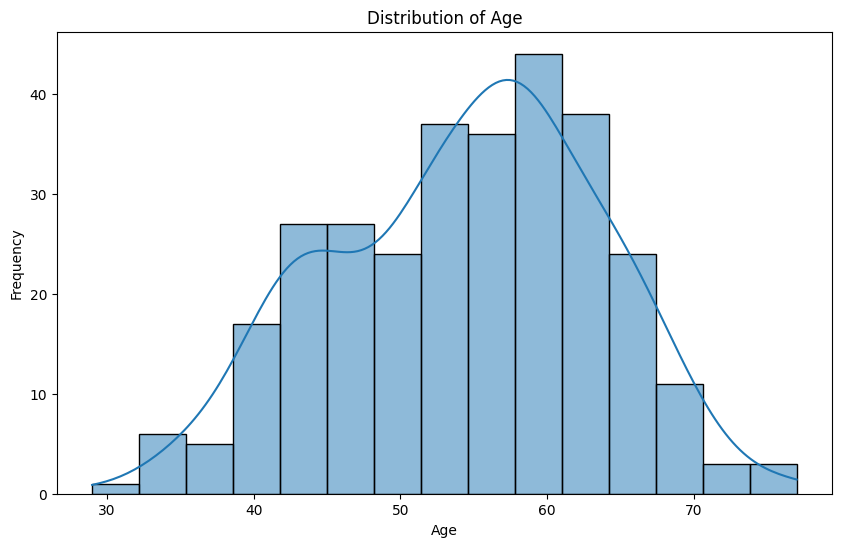

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# most of the patients are between 50 and 60 years old.

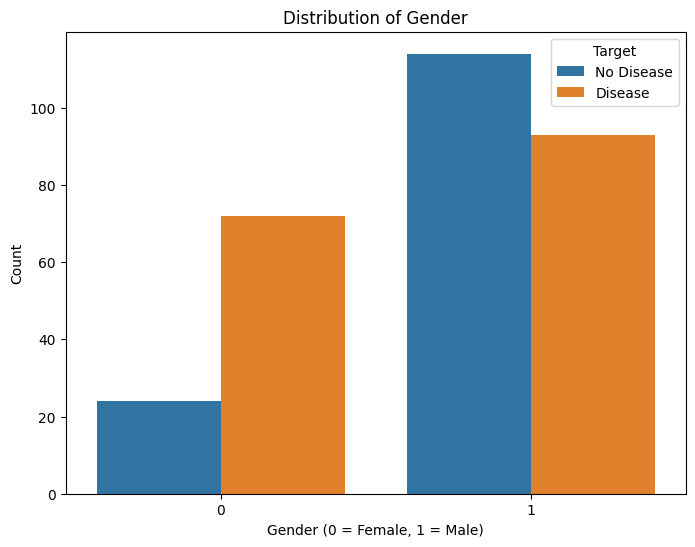

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='target')
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()
# There are more men in the data.
# Heart disease is much more common in men than women.

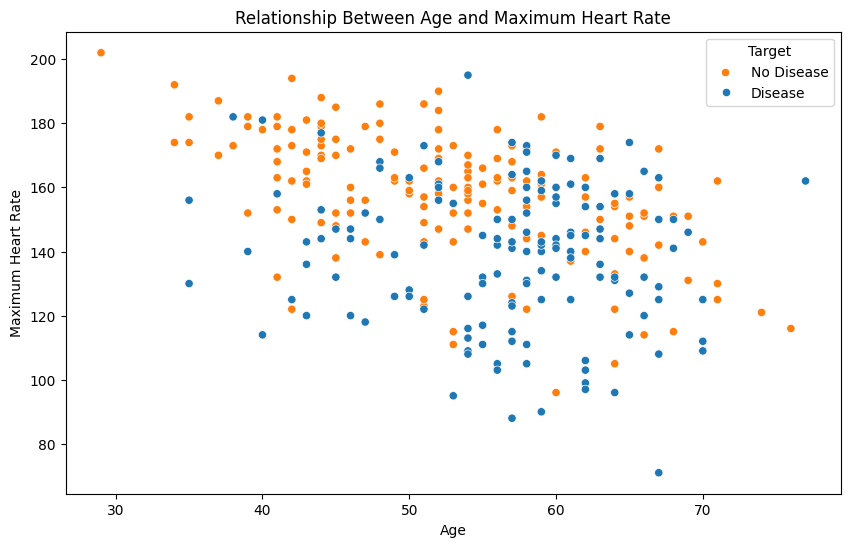

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title('Relationship Between Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()
# Patients with heart disease usually have a higher maximum heart rate.
# Also, it is observed that the maximum heart rate decreases with age.

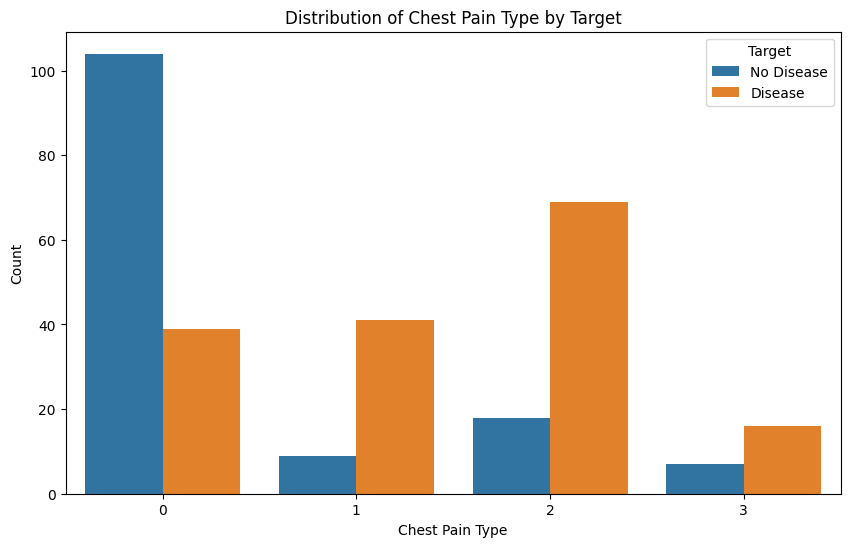

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', hue='target')
plt.title('Distribution of Chest Pain Type by Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()

# Type 0 pain (Typical angina) is often associated with the absence of heart disease.
# While type 1 (Atypical angina), type 2 (Non-anginal pain), and type 3 (Asymptomatic) pains are more associated with heart disease.

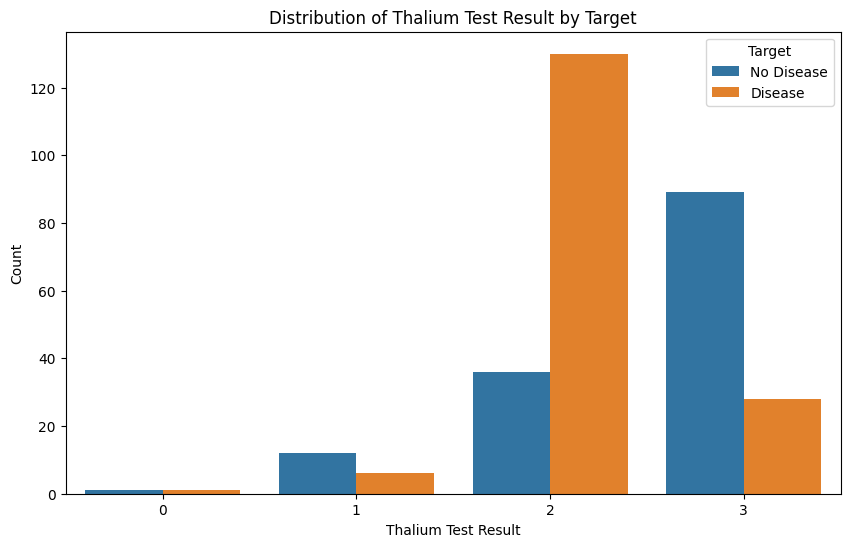

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='thal', hue='target')
plt.title('Distribution of Thalium Test Result by Target')
plt.xlabel('Thalium Test Result')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()

# Patients with thallium test result of 2 (reversible defect) are more at risk of heart disease.
# While patients with a result of 1 (Fixed defect) or 3 (Normal) are less at risk.

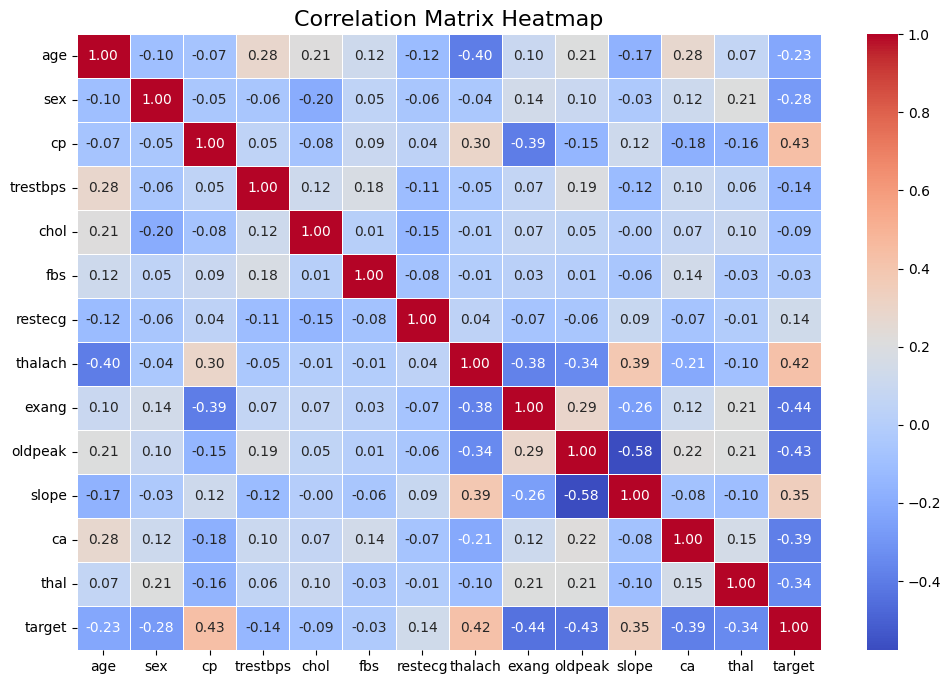

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

# **Preprocessing**
**Outlier Removal**

In [19]:
#numerical_features = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca']


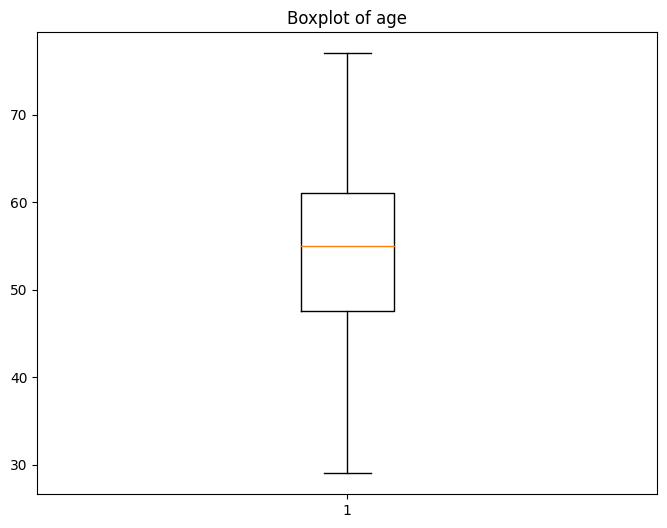

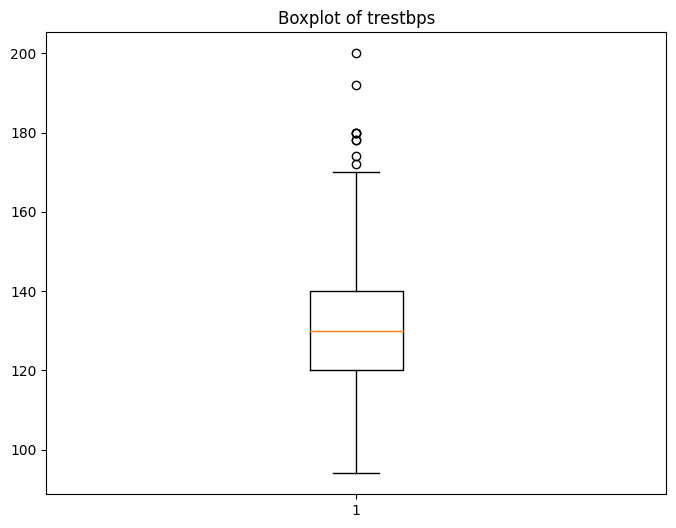

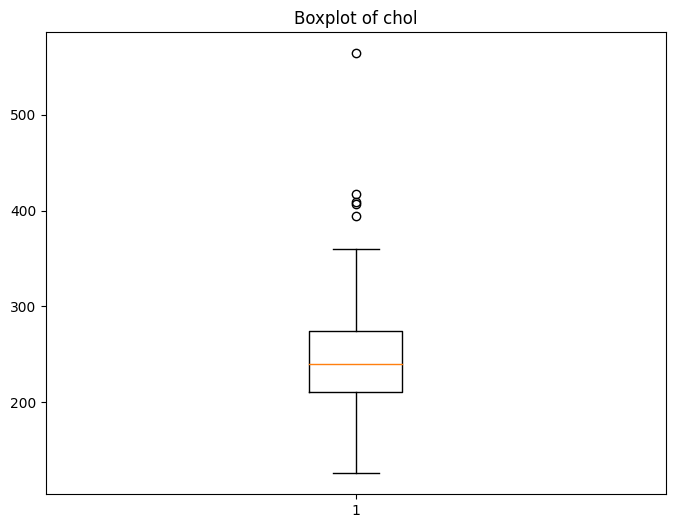

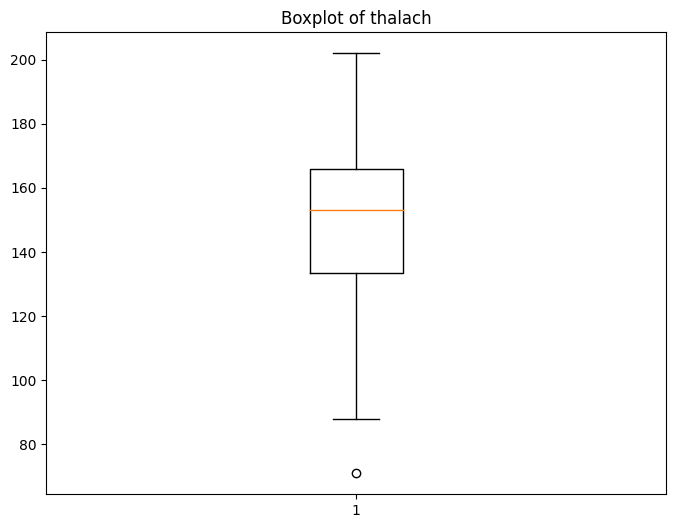

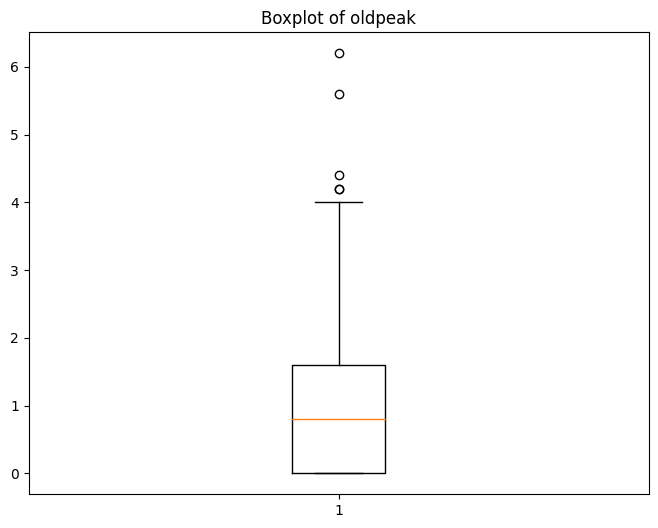

In [20]:
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in num_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# **One Hot Encoding**

In [21]:
categorical_columns = ['cp', 'slope', 'thal' , 'restecg']

In [22]:
# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded = df_encoded.astype(int)

In [23]:
df_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2,0,1,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3,0,1,0,1,0,0,0,0,1,0,1,0
2,41,0,130,204,0,172,0,1,0,1,1,0,0,0,1,0,1,0,0,0
3,56,1,120,236,0,178,0,0,0,1,1,0,0,0,1,0,1,0,1,0
4,57,0,120,354,0,163,1,0,0,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0,0,0,0,0,0,1,0,0,0,1,1,0
299,45,1,110,264,0,132,0,1,0,0,0,0,1,1,0,0,0,1,1,0
300,68,1,144,193,1,141,0,3,2,0,0,0,0,1,0,0,0,1,1,0
301,57,1,130,131,0,115,1,1,1,0,0,0,0,1,0,0,0,1,1,0


In [24]:
df_encoded.dtypes

,0
age,int64
sex,int64
trestbps,int64
chol,int64
fbs,int64
thalach,int64
exang,int64
oldpeak,int64
ca,int64
target,int64


# **Splitting**

In [25]:
x = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [26]:
y.value_counts()

,count
target,
1,165
0,138


In [27]:
##Sampling
over_sampler=RandomOverSampler()
x_over,y_over=over_sampler.fit_resample(x,y)

In [28]:
y_over.value_counts()

,count
target,
1,165
0,165


In [29]:
#Splitting
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42)

In [30]:
#Scaling
minmax=MinMaxScaler()
x_train_scaled=minmax.fit_transform(x_train)
x_test_scaled=minmax.transform(x_test)

# **Model Building and Training**

In [31]:
models=[KNeighborsClassifier(),SVC(),GaussianNB(),RandomForestClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for i in models:
  i.fit(x_train_scaled,y_train)
  y_pred=i.predict(x_test_scaled)
  print(i)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print('--------------------------------------------------------')

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        44
           1       0.83      0.78      0.80        55

    accuracy                           0.79        99
   macro avg       0.79      0.79      0.79        99
weighted avg       0.79      0.79      0.79        99

[[35  9]
 [12 43]]
--------------------------------------------------------
SVC()
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        44
           1       0.81      0.78      0.80        55

    accuracy                           0.78        99
   macro avg       0.78      0.78      0.78        99
weighted avg       0.78      0.78      0.78        99

[[34 10]
 [12 43]]
--------------------------------------------------------
GaussianNB()
              precision    recall  f1-score   support

           0       0.78      0.41      0.54        44
           1       0.66      0.91      0.76

# **Model Evaluation**

In [32]:
#crossvalidation
from sklearn.model_selection import cross_val_score
scoring=[]
cross_val_score(XGBClassifier(),minmax.transform(x),y,cv=5).mean()


0.8083060109289617

In [33]:
#hyperparametertuning
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1,10],
            'max_depth':[i for i in range(3,20)],
            "n_estimators":[i for i in range(50,1001,50)]}

rs_cv=RandomizedSearchCV(XGBClassifier(),parameters,cv=5,n_iter=4)
rs_cv.fit(x_train_scaled,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=4,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000]})

In [34]:
rs_cv.best_score_

0.8137835337650323

# **Final prediction**

In [35]:
tuned_model=rs_cv.best_estimator_
y_pred=tuned_model.predict(x_test_scaled)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.78        44
           1       0.87      0.71      0.78        55

    accuracy                           0.78        99
   macro avg       0.79      0.79      0.78        99
weighted avg       0.79      0.78      0.78        99

